In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

from epf.util import load_and_concat_data
from epf.config import PROCESSED_DATA_DIR, FeatureConfig

In [2]:
file_paths = {'de_prices': ['de_prices_2020.csv', 'de_prices_2021.csv', 'de_prices_2022.csv', 'de_prices_2023.csv', 'de_prices_2024.csv']}

COLORS = {
    "blue": "#3a609c",
    "blue_grey": "#69a0cb",
    "light_blue": "#afe1f5",
    "dark_green": "#345c0e",
    "olive": "#74953d",
    "green": "#c0d159",
    "gold": "#ffd700",
    "orange": "#ffb14e",
    "light_orange": "#fa8775",
    "magenta": "#840853",
    "purple": "#ba55aa",
    "light_purple": "#d1a7ef"
}

In [3]:
tmp = []

for file_path in file_paths.values():
    col_name = [k for k, v in file_paths.items() if v == file_path]
    data = load_and_concat_data(file_path, col_name[0])
    tmp.append(data)

df = pd.concat(tmp, axis=1)

In [4]:
df['volatility'] = df['de_prices'].rolling(window=24).std()
df['year'] = df.index.year
df['day'] = [x.strftime('%j') for x in df.index]
df['week'] = [x.strftime('%W') for x in df.index]

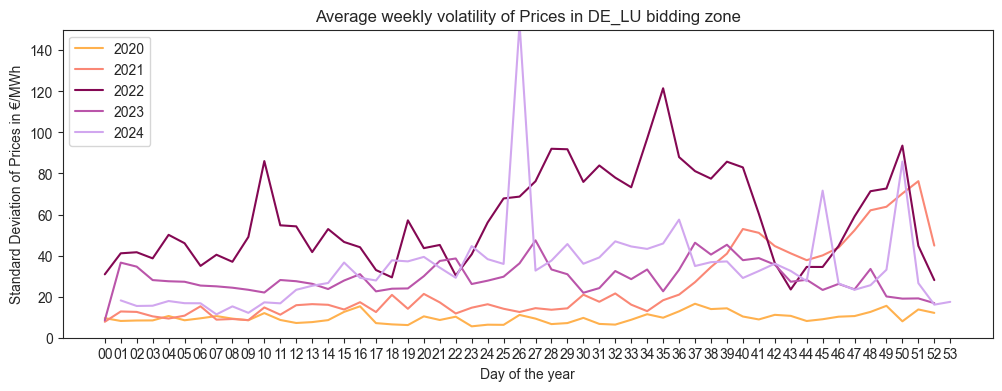

In [57]:
df_plot_volatility = df[['volatility', 'year', 'week']].groupby(['week', 'year']).mean()[['volatility']].reset_index()
df_plot_volatility.drop(df_plot_volatility[df_plot_volatility['year'] == 2019].index, inplace=True)

palette = {
    2020: COLORS['orange'],
    2021: COLORS['light_orange'],
    2022: COLORS['magenta'],
    2023: COLORS['purple'],
    2024: COLORS['light_purple'],
}

sns.set_style('ticks')

plt.figure(figsize=(12, 4))
sns.lineplot(data = df_plot_volatility, x='week', y='volatility', hue='year', palette=palette, legend=True)
plt.title('Average weekly volatility of Prices in DE_LU bidding zone')
plt.xlabel('Day of the year')
plt.ylabel('Standard Deviation of Prices in €/MWh')
plt.ylim(0, 150)
plt.legend(loc='upper left')

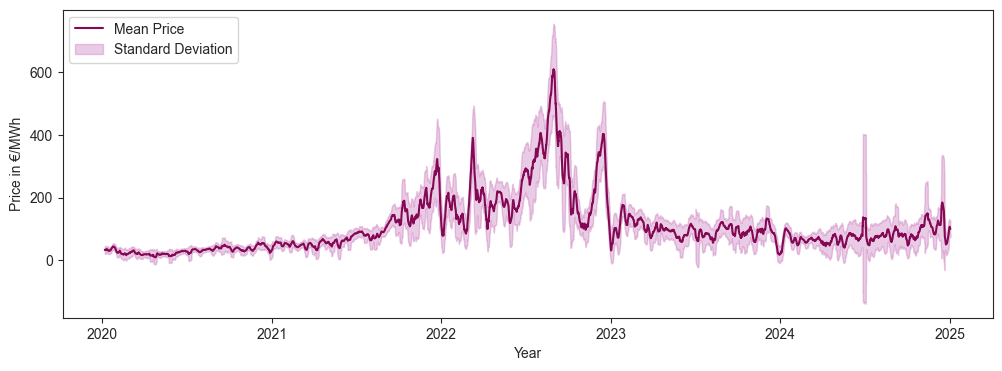

In [6]:
df['mean_price'] = df['de_prices'].rolling(window=24*7).mean()
df['std_dev'] = df['de_prices'].rolling(window=24*7).std()

df['upper_band'] = df['mean_price'] + df['std_dev']
df['lower_band'] = df['mean_price'] - df['std_dev']

sns.set_style('ticks')

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['mean_price'], color=COLORS['magenta'], label='Mean Price')
plt.fill_between(df.index, df['lower_band'], df['upper_band'], color=COLORS['purple'], alpha=0.3, label='Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Price in €/MWh')
plt.legend(loc='upper left')

#plt.title('Average weekly volatility of Prices in DE_LU bidding zone')

plt.savefig("../reports/figures/volatility.pdf", dpi=300, bbox_inches='tight')

In [6]:
path = PROCESSED_DATA_DIR / "features.csv"
df = pd.read_csv(path, index_col=0, parse_dates=True)

In [13]:
df

,de_prices_hat_rm_seasonal,ch_prices_hat_rm_seasonal,dk1_prices_hat_rm_seasonal,dk2_prices_hat_rm_seasonal,fr_prices_hat_rm_seasonal,de_lu_price_7_day_lag,de_lu_price_1_day_lag,de_lu_price_12_hour_lag,de_lu_price_1_hour_lag,de_solar_gen_rm_seasonal,...,de_gas_gen_rm_seasonal,de_lignite_gen_rm_seasonal,de_hard_coal_gen_rm_seasonal,de_load_rm_seasonal,ch_load_rm_seasonal,dk_load_rm_seasonal,fr_load_rm_seasonal,month,day_of_week,holiday
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-12-31 23:00:00+00:00,59.237365,31.060762,69.625022,79.878606,64.683394,0.000000,0.000000,0.000000,0.000000,1560.567219,...,2398.962574,7149.331330,4346.000552,49594.451017,7549.551807,3993.071539,49043.458318,12,6,0
2023-01-01 00:00:00+00:00,64.515174,33.219155,72.975606,82.494844,71.772860,0.000000,0.000000,0.000000,59.237365,1547.539673,...,2430.104250,7080.911332,4415.371981,50014.050326,7549.788557,4002.537668,49756.201525,1,7,1
2023-01-01 01:00:00+00:00,66.723422,39.263156,74.062323,84.075513,73.964489,0.000000,0.000000,0.000000,64.515174,1535.775695,...,2416.035478,7078.608616,4498.871968,50142.277158,7567.771297,3996.803778,49827.785417,1,7,1
2023-01-01 02:00:00+00:00,68.004958,43.120039,77.369882,86.659602,78.940550,0.000000,0.000000,0.000000,66.723422,1523.803477,...,2382.670094,7129.434030,4540.044861,49946.634612,7153.239046,3937.575408,49771.334872,1,7,1
2023-01-01 03:00:00+00:00,69.209481,53.405810,77.768006,88.779323,80.030259,0.000000,0.000000,0.000000,68.004958,1513.976113,...,2411.335748,7221.594894,4580.350475,49486.383369,7324.665384,3885.856403,49505.882382,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 18:00:00+00:00,64.607452,119.638457,36.456318,32.853733,83.253990,99.397638,105.877055,77.787226,67.662825,1950.192657,...,7539.317886,6166.039235,3420.089977,49817.303171,5795.232011,4425.842197,64112.335285,12,2,0
2024-12-31 19:00:00+00:00,58.221412,119.704207,32.833589,32.752820,84.644232,92.968945,106.822289,73.513060,64.607452,1950.508512,...,6988.208465,5909.408505,3460.616383,49814.889987,5800.650468,4456.518333,64412.976042,12,2,0
2024-12-31 20:00:00+00:00,56.674892,121.277820,33.482019,33.426614,86.399321,87.001384,106.925838,74.697916,58.221412,1953.608869,...,6880.665726,5128.262152,3484.750453,49803.040443,5892.878642,4470.212702,64676.398289,12,2,0


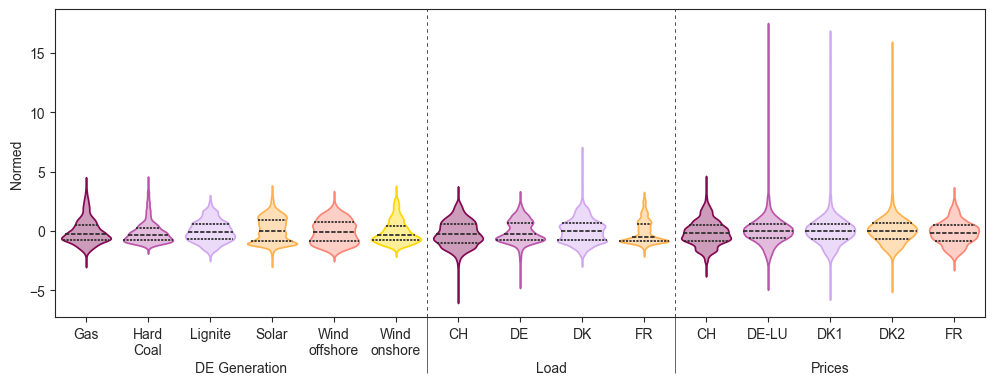

In [76]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open("../data/processed/train_data/train_df.pkl", "rb") as f:
    train_df = pkl.load(f)
fs = pd.read_csv("../data/processed/features.csv", index_col=0, parse_dates=True)

feature_set = fs[['de_gas_gen_rm_seasonal', 'de_hard_coal_gen_rm_seasonal', 'de_lignite_gen_rm_seasonal', 'de_solar_gen_rm_seasonal', 'de_wind_gen_offshore_rm_seasonal', 'de_wind_gen_onshore_rm_seasonal', 'ch_load_rm_seasonal', 'de_load_rm_seasonal', 'dk_load_rm_seasonal', 'fr_load_rm_seasonal', 'ch_prices_hat_rm_seasonal', 'de_prices_hat_rm_seasonal', 'dk1_prices_hat_rm_seasonal', 'dk2_prices_hat_rm_seasonal', 'fr_prices_hat_rm_seasonal']]
train_df = train_df[['de_gas_gen_rm_seasonal', 'de_hard_coal_gen_rm_seasonal', 'de_lignite_gen_rm_seasonal', 'de_solar_gen_rm_seasonal', 'de_wind_gen_offshore_rm_seasonal', 'de_wind_gen_onshore_rm_seasonal', 'ch_load_rm_seasonal', 'de_load_rm_seasonal', 'dk_load_rm_seasonal', 'fr_load_rm_seasonal', 'ch_prices_hat_rm_seasonal', 'de_prices_hat_rm_seasonal', 'dk1_prices_hat_rm_seasonal', 'dk2_prices_hat_rm_seasonal', 'fr_prices_hat_rm_seasonal']]

palette = {
    # first palette
    'de_gas_gen_rm_seasonal': COLORS['magenta'],
    'de_hard_coal_gen_rm_seasonal': COLORS['purple'],
    'de_lignite_gen_rm_seasonal': COLORS['light_purple'],
    'de_solar_gen_rm_seasonal': COLORS['orange'],
    'de_wind_gen_offshore_rm_seasonal': COLORS['light_orange'],
    'de_wind_gen_onshore_rm_seasonal': COLORS['gold'],

    # second palette
    'ch_load_rm_seasonal': COLORS['magenta'],
    'de_load_rm_seasonal': COLORS['purple'],
    'dk_load_rm_seasonal': COLORS['light_purple'],
    'fr_load_rm_seasonal': COLORS['orange'],

    # third palette
    'ch_prices_hat_rm_seasonal': COLORS['magenta'],
    'de_prices_hat_rm_seasonal': COLORS['purple'],
    'dk1_prices_hat_rm_seasonal': COLORS['light_purple'],
    'dk2_prices_hat_rm_seasonal': COLORS['orange'],
    'fr_prices_hat_rm_seasonal': COLORS['light_orange'],
}

labels = {
    #first labels
    'de_solar_gen_rm_seasonal': 'Solar',
    'de_wind_gen_onshore_rm_seasonal': 'Wind\nonshore',
    'de_wind_gen_offshore_rm_seasonal': 'Wind\noffshore',
    'de_hard_coal_gen_rm_seasonal': 'Hard\nCoal',
    'de_lignite_gen_rm_seasonal': 'Lignite',
    'de_gas_gen_rm_seasonal': 'Gas',

    # second labels
    'de_load_rm_seasonal': 'DE',
    'fr_load_rm_seasonal': 'FR',
    'ch_load_rm_seasonal': 'CH',
    'dk_load_rm_seasonal': 'DK',

    # third labels
    'de_prices_hat_rm_seasonal': 'DE-LU',
    'ch_prices_hat_rm_seasonal': 'CH',
    'dk1_prices_hat_rm_seasonal': 'DK1',
    'dk2_prices_hat_rm_seasonal': 'DK2',
    'fr_prices_hat_rm_seasonal': 'FR',
}

train_mean = train_df.mean()
train_std = train_df.std()

keys = feature_set.keys()

sns.set_style("ticks")

df_std = (feature_set - train_mean) / train_std
plt.figure(figsize=(12, 4))

ax = sns.violinplot(data=df_std, inner="quart", palette=palette, saturation=1)
for violin, color in zip(ax.collections[::1], palette.values()):
    facecolor = plt.matplotlib.colors.to_rgba(color, alpha=0.4)
    violin.set_facecolor(facecolor)
    violin.set_edgecolor(color)
#ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xticks(range(len(df_std.columns)))
ax.set_xticklabels([labels[col] for col in df_std.columns])
ax.set_ylabel('Normed')
ax.axvline(x = 5.5, color='black', linestyle=(0, (5, 5)), linewidth=0.5)
ax.axvline(x = 9.5, color='black', linestyle=(0, (5, 5)), linewidth=0.5)

sec = ax.secondary_xaxis(location=0)
sec.set_xticks(ticks=[2.5, 7.5, 12], labels=['\nDE Generation', '\nLoad', '\nPrices'])
sec.tick_params('x', length=0, pad=20)
sec.spines["bottom"].set_visible(False)

sec2 = ax.secondary_xaxis(location=0)
sec2.set_xticks(ticks=[5.5, 9.5], labels=[])
sec2.tick_params('x', length=40, width=0.5)
sec2.spines["bottom"].set_visible(False)

plt.savefig("../reports/figures/normed_feature_distribution_corrected.pdf", dpi=300, bbox_inches='tight')

plt.show()

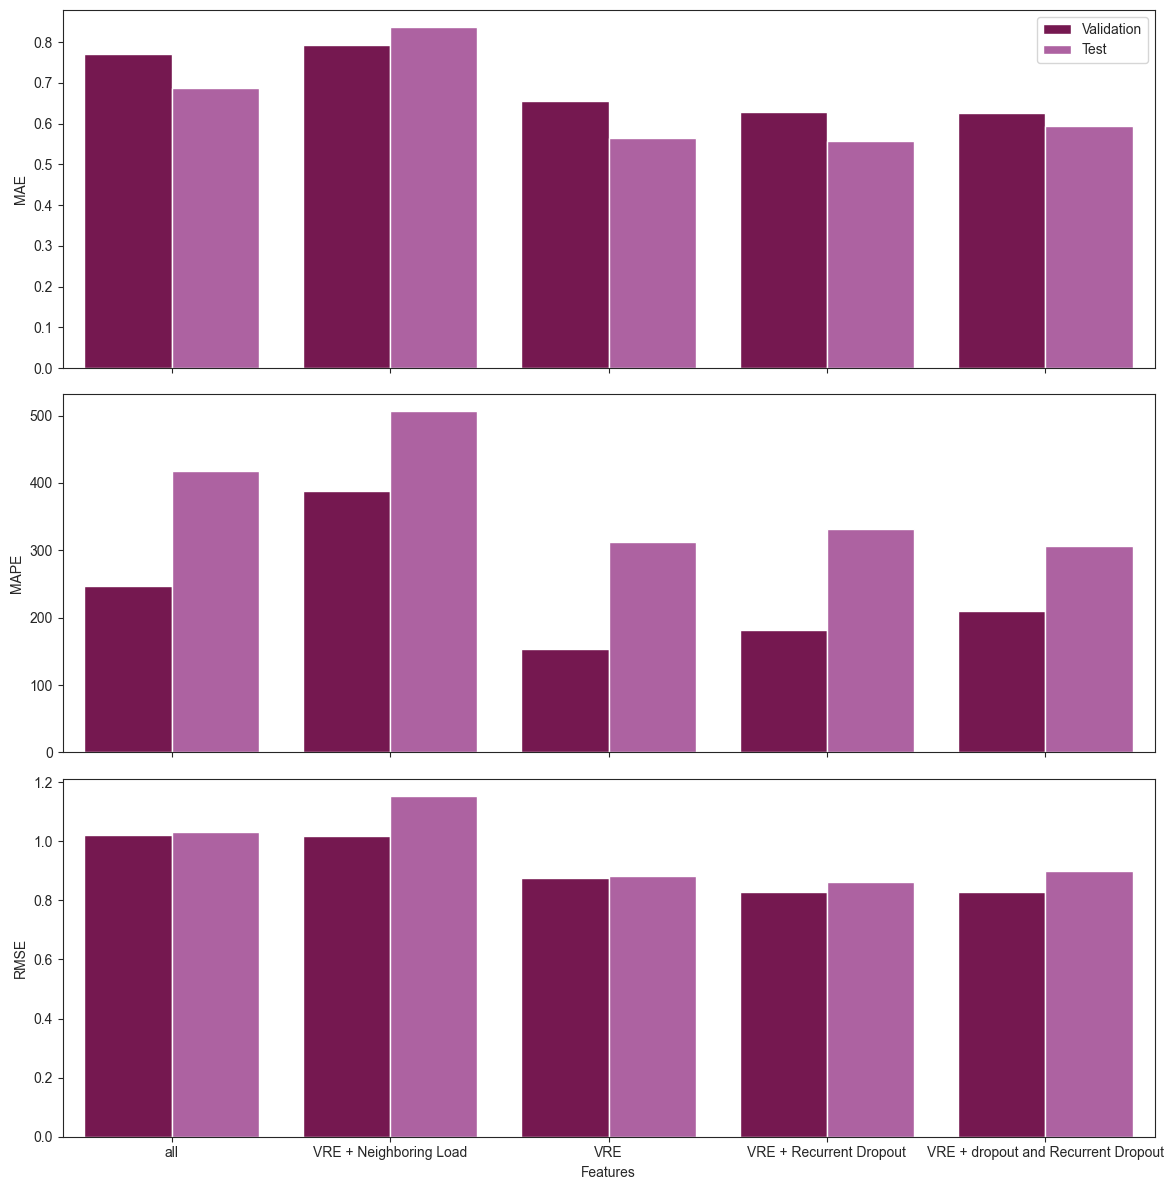

In [5]:
import pickle as pkl
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

with open("../data/processed/performance.pkl", "rb") as f:
    performance = pkl.load(f)

with open("../data/processed/val_performance.pkl", "rb") as f:
    val_performance = pkl.load(f)

models = {
    'lstm_all_features': 'all',
    'lstm_vre_neighboring_load': 'VRE + Neighboring Load',
    'lstm_vre': 'VRE',
    'lstm_vre_recurrent_dropout': 'VRE + Recurrent Dropout',
    'lstm_vre_dropout_recurrent_dropout': 'VRE + dropout and Recurrent Dropout',}

palette = {
    'Validation': COLORS['magenta'],
    'Test': COLORS['purple'],
}

# Metriken, die geplottet werden sollen
metrics = {'mean_absolute_error':'MAE', 'mean_absolute_percentage_error':'MAPE', 'root_mean_squared_error':'RMSE'}

# Bereite die Daten für die Plots vor
data = []
for model_key, model_name in models.items():
    for metric, name in metrics.items():
        data.append({
            'Model': model_name,
            'Metric': name,
            'Dataset': 'Validation',
            'Value': val_performance[model_key][metric]
        })
        data.append({
            'Model': model_name,
            'Metric': name,
            'Dataset': 'Test',
            'Value': performance[model_key][metric]
        })

df = pd.DataFrame(data)

# Erstelle die Barplots
sns.set_style('ticks')
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4*len(metrics)), sharex=True)

for i, (metric_key, metric_name) in enumerate(metrics.items()):
    sns.barplot(
        data=df[df['Metric'] == metric_name],
        x='Model',
        y='Value',
        hue='Dataset',
        palette=palette,
        ax=axes[i],
        dodge=True
    )
    axes[i].set_ylabel(metric_name)
    axes[i].set_xlabel('Features')

    if i == 0:
        axes[i].legend()
    else:
        axes[i].legend().remove()

plt.tight_layout()
plt.show()

### absolute error over time

retrieve the predictions, maybe group them by day/week/month to see error at different points in time

In [ ]:
import numpy as np
import pandas as pd
import pickle as pkl

with open("../models/lstm_all_features.pkl", "rb") as f:
    model_obj = pkl.load(f)

window = model_obj['window']
test_df = model_obj['test_df']

all_preds = []
all_times = []

# Loop through the test dataset
for (x_batch, _), label_times in window.test:
    y_pred = model.predict(x_batch)

    flat_preds = y_pred.reshape(-1, y_pred.shape[-1])
    flat_times = label_times.numpy().reshape(-1)

    # Decode byte strings to UTF-8
    flat_times = [ts.decode("utf-8") if isinstance(ts, bytes) else ts for ts in flat_times]

    # Convert to pandas datetime
    flat_times = pd.to_datetime(flat_times)

    all_preds.append(flat_preds)
    all_times.append(flat_times)

# Stack all batches
all_preds = np.vstack(all_preds)
all_times = np.concatenate(all_times)

In [ ]:
# Create final DataFrame
df = pd.DataFrame(all_preds, columns=window.label_columns)
df.insert(0, "timestamp", all_times)
df = df.groupby('timestamp').mean().reset_index()
df

In [ ]:
from datetime import datetime
diff = df.join(test_df['de_prices_hat_rm_seasonal'], on='timestamp', lsuffix='_pred', rsuffix='_true', how='inner')

diff['prediction_error'] = diff['de_prices_hat_rm_seasonal_pred'] - diff['de_prices_hat_rm_seasonal_true']

diff['timestamp'] = pd.to_datetime(diff['timestamp'])
diff.set_index('timestamp', drop=True, inplace=True)

grouped = diff.resample('D').mean().reset_index()

plt.figure(figsize=(12, 4))
sns.barplot(grouped['prediction_error'])